<a href="https://colab.research.google.com/github/nishanthsnaik/SCT_ML_1/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries,Modules

Loading datasets

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [48]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sample = pd.read_csv("/content/sample_submission.csv")

In [49]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Preprocessing

In [50]:
# Assessing ID
test_id=test['Id']

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Checking for Missing values

In [53]:
train[['BedroomAbvGr','GrLivArea','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','TotalBsmtSF']].isnull().sum()

,0
BedroomAbvGr,0
GrLivArea,0
HalfBath,0
FullBath,0
BsmtHalfBath,0
BsmtFullBath,0
TotalBsmtSF,0


In [54]:
test[['BedroomAbvGr','GrLivArea','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','TotalBsmtSF']].isnull().sum()

,0
BedroomAbvGr,0
GrLivArea,0
HalfBath,0
FullBath,0
BsmtHalfBath,2
BsmtFullBath,2
TotalBsmtSF,1


Imputation

In [55]:
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(0)

Creating New Columns for the reducing the dimensions

In [56]:
train['Totalarea']=train['TotalBsmtSF']+train['GrLivArea']
train['Totalbath']=train['BsmtFullBath']+train['FullBath']+train['BsmtHalfBath']*0.5 +train['HalfBath']*0.5

In [57]:
final_train_data=train[['Totalarea','BedroomAbvGr','Totalbath','SalePrice']]

In [58]:
test['Totalarea']=test['TotalBsmtSF']+test['GrLivArea']
test['Totalbath']=test['BsmtFullBath']+test['FullBath']+test['BsmtHalfBath']*0.5 +test['HalfBath']*0.5

In [59]:
final_test_data=test[['Totalarea','BedroomAbvGr','Totalbath']]

In [60]:
final_train_data.head()

,Totalarea,BedroomAbvGr,Totalbath,SalePrice
0,2566,3,3.5,208500
1,2524,3,2.5,181500
2,2706,3,3.5,223500
3,2473,3,2.0,140000
4,3343,4,3.5,250000


In [61]:
final_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Totalarea     1460 non-null   int64  
 1   BedroomAbvGr  1460 non-null   int64  
 2   Totalbath     1460 non-null   float64
 3   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [62]:
final_train_data.describe()

,Totalarea,BedroomAbvGr,Totalbath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,2572.893151,2.866438,2.210616,180921.195890
std,823.598492,0.815778,0.785399,79442.502883
min,334.000000,0.000000,1.000000,34900.000000
25%,2014.000000,2.000000,2.000000,129975.000000
50%,2479.000000,3.000000,2.000000,163000.000000
75%,3008.500000,3.000000,2.500000,214000.000000
max,11752.000000,8.000000,6.000000,755000.000000


In [63]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Totalarea     1459 non-null   float64
 1   BedroomAbvGr  1459 non-null   int64  
 2   Totalbath     1459 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 34.3 KB


Seperating the Features and Target for training and testing

In [64]:
Features=['Totalarea','BedroomAbvGr','Totalbath']
Target=['SalePrice']

Plotting the features and target in the graph for better visualization

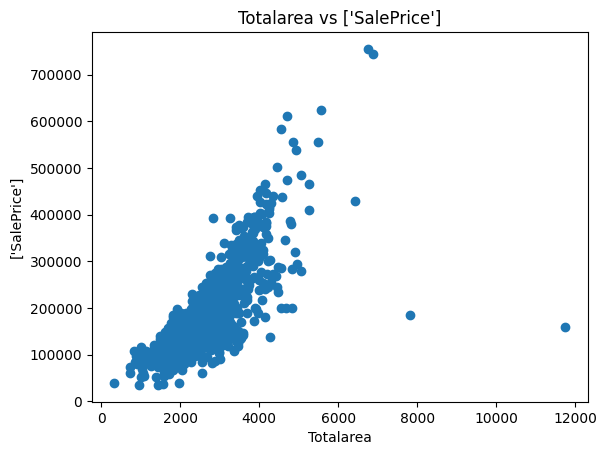

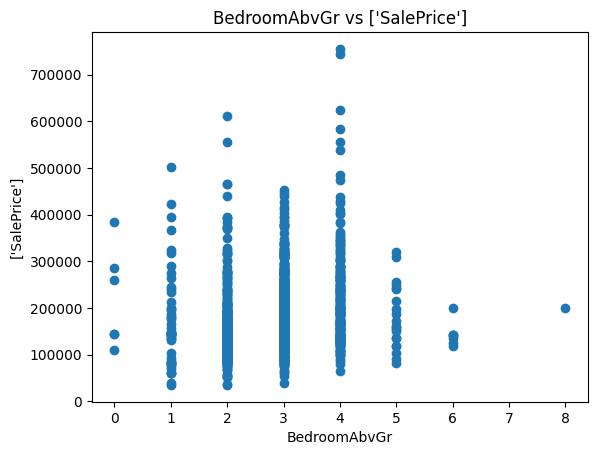

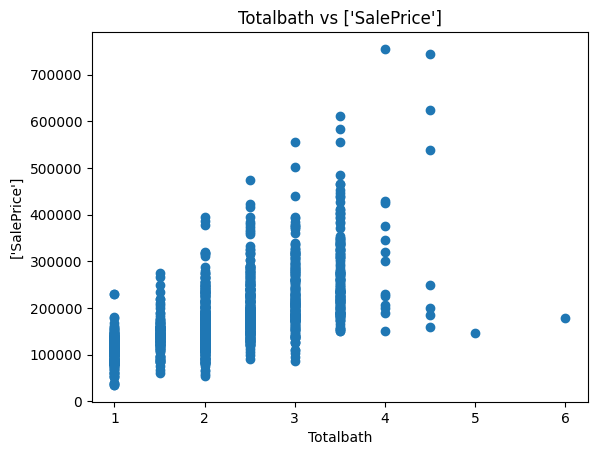

In [65]:
for col in Features:
    plt.figure()
    plt.scatter(final_train_data[col], final_train_data[Target])
    plt.xlabel(col)
    plt.ylabel(Target)
    plt.title(f"{col} vs {Target}")
    plt.show()

In [66]:
final_train_data.head()

,Totalarea,BedroomAbvGr,Totalbath,SalePrice
0,2566,3,3.5,208500
1,2524,3,2.5,181500
2,2706,3,3.5,223500
3,2473,3,2.0,140000
4,3343,4,3.5,250000


Dropping the target column and assinging the train and test datatset

In [67]:
X=final_train_data.drop('SalePrice',axis=1)
Y=final_train_data['SalePrice']

In [68]:
print(X)

      Totalarea  BedroomAbvGr  Totalbath
0          2566             3        3.5
1          2524             3        2.5
2          2706             3        3.5
3          2473             3        2.0
4          3343             4        3.5
...         ...           ...        ...
1455       2600             3        2.5
1456       3615             3        3.0
1457       3492             4        2.0
1458       2156             2        2.0
1459       2512             3        2.5

[1460 rows x 3 columns]


In [69]:
print(Y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


Splitting the Training dataset and testing test for each features and target


In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Model Training

Linear Regression

In [71]:
lr=LinearRegression()

In [72]:
lr.fit(X_train,Y_train)

LinearRegression()

Prediction

In [73]:
y_predict=lr.predict(X_test)

Model Evaluation

In [74]:
final_predict_Y=lr.predict(final_test_data)

In [75]:
mae=mean_absolute_error(Y_test, y_predict)
mse=mean_squared_error(Y_test, y_predict)
rmse=np.sqrt(mse)
r2_value=r2_score(Y_test,y_predict)

In [76]:
print("mean_absolute_error", mae)
print("mean_squared_error", mse)
print("root_mean_square_error",rmse)
print("R2 Score:", r2_value)

mean_absolute_error 29657.319001780263
mean_squared_error 2143601547.2420204
root_mean_square_error 46299.044776777206
R2 Score: 0.7205331964586517


Visualize Regression Results

Actual vs Predicted Plot

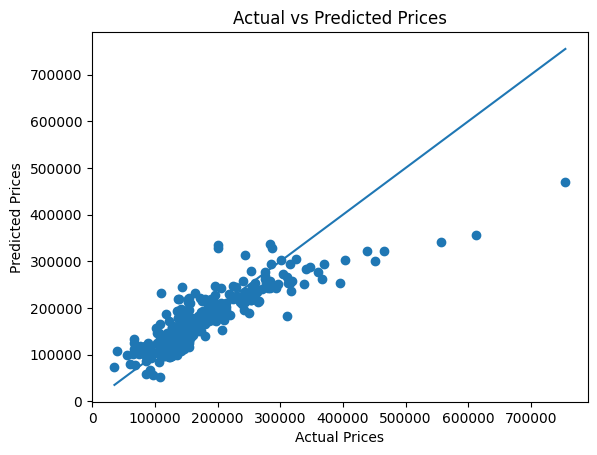

In [77]:
plt.figure()
plt.scatter(Y_test, y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

# Ideal line
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()])

plt.show()

To reduce the Right-skewed,large outliers,non-constant variance we use log of the target variable (y) before training

In [78]:
y_log = np.log(Y)

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y_log,test_size=0.2,random_state=42)

In [80]:
lr=LinearRegression()

In [81]:
lr.fit(X_train,Y_train)

LinearRegression()

In [82]:
y_predict=lr.predict(X_test)

In [83]:
final_predict_Y=lr.predict(final_test_data)

In [84]:
r2_value=r2_score(Y_test,y_predict)
print(r2_value)

0.7288934096684249


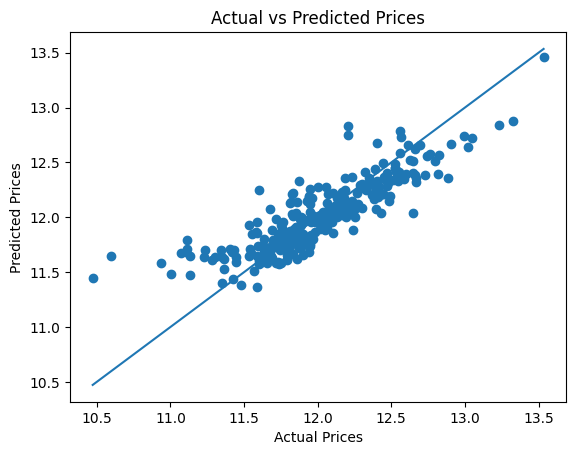

In [85]:
plt.figure()
plt.scatter(Y_test, y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

# Ideal line
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()])

plt.show()

Model Evaluation

In [86]:
final_predict_Y=lr.predict(final_test_data)

Prepare  submission file

In [87]:
submission = pd.DataFrame({
    "Id": test['Id'],
    "SalePrice": final_predict_Y
})

In [88]:
submission.to_csv("submission.csv", index=False)

Visualizing the Correlations of the Features

In [89]:
num_features = train[['Totalarea','Totalbath','BedroomAbvGr','SalePrice']]

In [90]:
corr_matrix = num_features.corr()
corr_matrix

,Totalarea,Totalbath,BedroomAbvGr,SalePrice
Totalarea,1.000000,0.600509,0.359459,0.778959
Totalbath,0.600509,1.000000,0.234885,0.631731
BedroomAbvGr,0.359459,0.234885,1.000000,0.168213
SalePrice,0.778959,0.631731,0.168213,1.000000


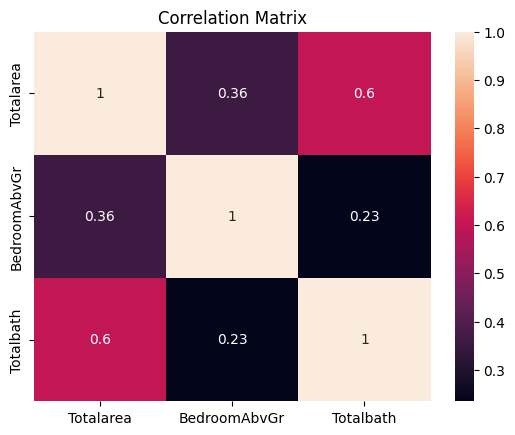

In [91]:
plt.figure()
sns.heatmap(train[['Totalarea','BedroomAbvGr','Totalbath']].corr(),
            annot=True)
plt.title("Correlation Matrix")
plt.show()

Checking Model Coffecients


In [92]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

print("Intercept:", lr.intercept_)

              Coefficient
Totalarea        0.000283
BedroomAbvGr    -0.044002
Totalbath        0.166503
Intercept: 11.055268135444146


SUMMARY
Model Performance Summary
	•	MAE: 29,657
	•	MSE: 2,143,601,547
	•	RMSE: 46,299
	•	R²: 0.7205
  
  Interpretation
	•	The model explains 72.05% of the variance in house prices.
	•	On average, predictions deviate from actual prices by ≈ 29,657 units (MAE).
	•	The RMSE of 46,299 indicates moderate prediction spread, with some larger errors present.
	•	The gap between MAE and RMSE suggests a few high-error predictions (possible outliers).

  Conclusion

A Linear Regression model was developed to predict house prices using selected structural features.
The model achieved an R² score of 0.72, indicating that approximately 72% of the variability in house prices is explained by the model.
The average prediction error is around 29,657 units, with an RMSE of 46,299, suggesting moderate predictive performance.
While the model captures key price-driving factors, further improvements can be made through feature engineering, handling multicollinearity, and applying regularization techniques such as Ridge or Lasso regression.
  